# Hypothesis Testing

For each of the following questions:  
   Formulate a null and alternative hypothesis (be as specific as you can be),  
   Then give an example of what a true positive, true negative, type I and type II errors would look like. 
    
Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### Has the network latency gone up since we switched internet service providers?


`H_0` = Average ping to a set of defined hosts is similar to what it was before ISP switch.  
`H_1` = Average ping to a set of defined hosts has changed compared to what it was before ISP switch.  


`type I error` = Increased usage is causing higher latency  || Somebody moved a decimal accidentally  
`type II error` = Lower overall latency coupled with latency spikes could make the average similar

#### Is the website redesign any good?


`H_0` = Company KPIs experienced no change, or changed negatively since website redesign.  
`H_1` = Company KPIs changed positively since website redesign.  

`I` = Falsely reject due to other factors influencing KPIs  
`II` = Fail to reject due to KPIs involved being disconnected from website performance

#### Is our television ad driving more sales?

`H_0` = Sales numbers experienced no change since introduction of AD.  
`H_1` = Sales numbers changed positively since introduction of AD.  
`H_2` = Sales numbers changed negatively since introduction of AD.  

`I` = Falsely reject due random spike in sales  
`II` = Fail to reject due to economic factors decreasing sales

# Comparing Means

In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics


#### 1. 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.  
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.  
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days.  
Use a .05 level of significance.

In [2]:
#Significance level 
alpha = 0.05
#Office 1
mu_1, sigma_1 = 90, 15
o1 = stats.norm(mu_1,sigma_1)
nobs1 = 40
#Office 2
mu_2, sigma_2 = 100, 20
o2 = stats.norm(mu_2,sigma_2)
nobs2 = 50


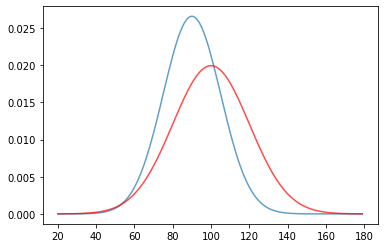

In [3]:
fig, ax = plt.subplots(1, 1)
x = np.arange(20,180)
y1 = o1.pdf(x)
y2 = o2.pdf(x)
ax =   [plt.plot(x,y1, alpha=0.7), 
        plt.plot(x,y2, alpha=0.7,color='red')]

> Form a hypothesis:

$H_0$ = Average time to sell at office1 == average time to sell at office2  
$H_a$ = Average time to sell at office1 != average time to sell at office2

We have two samples so we will use the **independent t-test**  
The question being asked is if they are **different**, so we will want to use a **2-tail test**.

In [4]:
t,p = stats.ttest_ind_from_stats(mu_1,sigma_1,nobs1,mu_2,sigma_2,nobs2)
t, p

(-2.6252287036468456, 0.01020985244923939)

A two tailed test = 
> `t != 0 AND p < α`

In [5]:
(t != 0 and p < alpha)
# True = rejecte H_0

True

Reject $H_0$

### 2. 

Load the mpg dataset and use it to answer the following questions:

a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?  
b. Are compact cars more fuel-efficient than the average car?  
c. Do manual cars get better gas mileage than automatic cars?


In [6]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### a. 
Is there a difference in fuel-efficiency in cars from 2008 vs 1999?  


> comparing  

two samples 2008 vs 2009  | avg fuel efficiency 

> question  

Is there a difference  

> tail type  

two tailed  

$H_0$ = averages are the same or close  
$H_a$ = averages vary significantly

Calculate average fuel economy assuming 50% highway and 50% city driving


- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [7]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)

mpg['fe'] = (mpg.cty + mpg.hwy) /2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,21.0


In [8]:
# seperate my two samples
fe_hm_2008 = mpg[mpg.year == 2008].avg_fe
fe_hm_1999 = mpg[mpg.year == 1999].avg_fe
fe_am_2008 = mpg[mpg.year == 2008].fe
fe_am_1999 = mpg[mpg.year == 1999].fe

Text(0.5, 1.0, 'fe_am_2008')

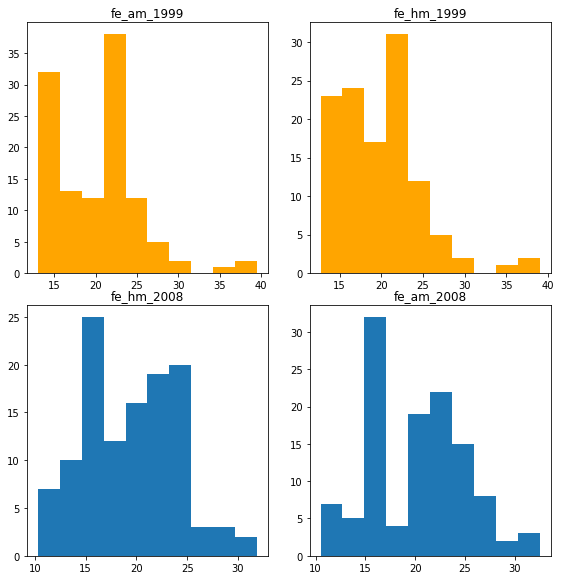

In [9]:
# plot them
plt.rc('figure', figsize=(8, 8))
fig, axs = plt.subplots(2,2)
fig.tight_layout()
ax = axs.flatten()

ax[0].hist(fe_am_1999, color='orange')
ax[0].set_title('fe_am_1999')

ax[1].hist(fe_hm_1999, color='orange')
ax[1].set_title('fe_hm_1999')

ax[2].hist(fe_hm_2008)
ax[2].set_title('fe_hm_2008')

ax[3].hist(fe_am_2008)
ax[3].set_title('fe_am_2008')

In [10]:
t1, p1 = stats.ttest_ind(fe_hm_1999, fe_hm_2008)
t2, p2 = stats.ttest_ind(fe_am_1999, fe_am_2008)
print(t1, p1)
print(t2, p2)

0.3011962975077886 0.7635345888327115
0.21960177245940962 0.8263744040323578


**Fail to reject $H_0$**

#### b. 
Are compact cars more fuel-efficient than the average car?  


This is a one sample test `stats.ttest_1samp()`  
This is also a 1-tailed test, testing for positive change so `t>0, p/2 < α`

$H_0$ = fuel effeciency of compact cars are not higher on average than average cars  
$H_a$ = compact cars fe > average fe

47

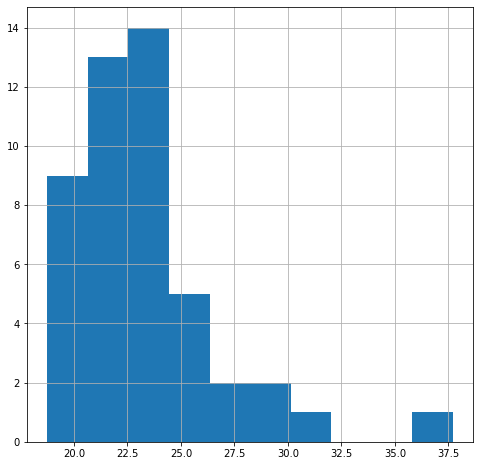

In [11]:
# Pull the subset
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
fe_compact.hist()
len(fe_compact)

In [12]:
mu = mpg.avg_fe.mean()
t, p = stats.ttest_1samp(fe_compact, mu)
t, p/2, alpha

(7.512360093161361, 7.808833174403667e-10, 0.05)

In [13]:
#`t>0, p/2 < α`
(t > 0 and (p/2 < alpha))

True

Reject $H_0$

c. Do manual cars get better gas mileage than automatic cars?

# Correlation

### 1.
Use the telco_churn data.  
Does tenure correlate with monthly charges? Total charges? 

What happens if you control for phone and internet service?

In [14]:
churn = pd.read_csv('telco_churn.csv')
churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

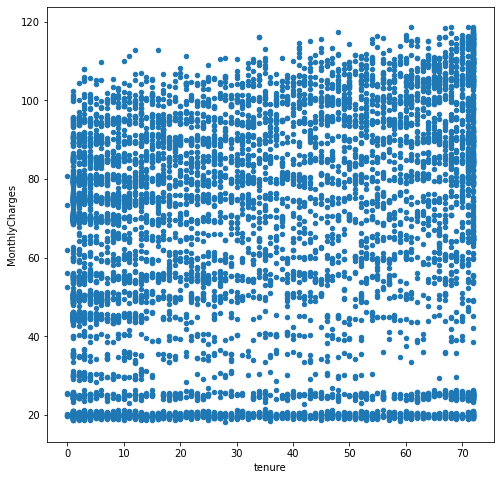

In [15]:
churn[['tenure', 'MonthlyCharges']].plot.scatter(0,1)

In [16]:
r, p = stats.pearsonr(churn.tenure, churn.MonthlyCharges)
r, p

(0.24789985628615008, 4.0940449915016345e-99)

There is a weak correlation

> What happens when you control for internet and phone service?

phone service == `(PhoneService == 'Yes' ) & (InternetService = 'No')`   
internet == `(Phoneservice == 'No')`

In [17]:
phone = churn[(churn.PhoneService == 'Yes')& (churn.InternetService == 'No')]
internet = churn[(churn.PhoneService == 'No')]


In [18]:
phone.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No


In [19]:
internet.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


In [20]:
stats.pearsonr(phone.tenure, phone.MonthlyCharges)


(0.34232562306194475, 3.356186955197392e-43)

moderately weak corellation

In [21]:
stats.pearsonr(internet.tenure, internet.MonthlyCharges)

(0.5857597986661366, 4.603370347342836e-64)

closer to strong correllation

#### 2.
Use the employees database.
 - Is there a relationship between how long an employee has been with the company and their salary?
 - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

##### Acquire data

In [22]:
def get_db_url(database, username='', password='', hostname='', env=''):
    if env != '':
        d = {}
        file = open(env)
        for line in file:
            (key, value) = line.split('=')
            d[key] = value.replace('\n', '').replace("'",'').replace('"','')
        username = d['username']
        hostname = d['hostname']
        password = d['password']
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
    return url

url = get_db_url('employees',env='./env.py')

query1 = '''
SELECT 
    *
FROM
    employees.employees
        JOIN
    employees.salaries USING (emp_no)
WHERE
    to_date > NOW()
;
'''

query2 = '''
SELECT 
    emp_no,
    hire_date,
    count(*) as n_titles
FROM
    employees.employees
        JOIN
    employees.titles USING (emp_no)
group by emp_no
;
'''

query3 = '''
SELECT 
	*
FROM
    employees.employees
        JOIN
    employees.titles USING (emp_no)
;
'''

salaries = pd.read_sql(query1, url)
n_titles = pd.read_sql(query2, url)
titles = pd.read_sql(query3, url)

In [23]:
salaries.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [24]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


In [25]:
n_titles.head()

,emp_no,hire_date,n_titles
0,10001,1986-06-26,1
1,10002,1985-11-21,1
2,10003,1986-08-28,1
3,10004,1986-12-01,2
4,10005,1989-09-12,2


In [26]:
titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


##### Is there a relationship between how long an employee has been with the company and their salary?

$H_0$ = No linear relationship  
$H_a$ = Some linear relationship  
$\alpha$ (Significance Level) = 0.05

In [27]:
salaries['hire_date'] = pd.to_datetime(salaries.hire_date)

In [28]:
pd.to_numeric(salaries.hire_date)

0         520128000000000000
1         501379200000000000
2         525571200000000000
3         533779200000000000
4         621561600000000000
                 ...        
240119    726796800000000000
240120    654393600000000000
240121    514425600000000000
240122    750470400000000000
240123    880848000000000000
Name: hire_date, Length: 240124, dtype: int64

<AxesSubplot:xlabel='hire_date', ylabel='salary'>

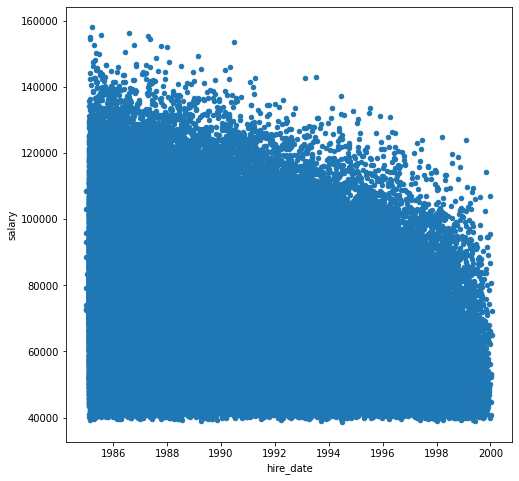

In [29]:
salaries.plot.scatter('hire_date','salary')

In [30]:
stats.pearsonr(pd.to_numeric(salaries.hire_date), salaries.salary)

(-0.3064625613186112, 0.0)

Reject $H_0$: There is a small linear relationship

#####  Is there a relationship between how long an employee has been with the company and the number of titles they have had?

##### SQL aggregation

In [31]:
n_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300024 non-null  int64 
 1   hire_date  300024 non-null  object
 2   n_titles   300024 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.9+ MB


In [32]:
n_titles.hire_date = pd.to_datetime(n_titles.hire_date)

In [33]:
n_titles['year'] = n_titles.hire_date.dt.year

In [34]:
n_titles.groupby('year').n_titles.mean()

year
1985    1.599388
1986    1.584288
1987    1.569446
1988    1.550674
1989    1.536733
1990    1.512886
1991    1.491537
1992    1.459514
1993    1.402543
1994    1.303809
1995    1.215931
1996    1.124922
1997    1.043485
1998    1.000000
1999    1.000000
2000    1.000000
Name: n_titles, dtype: float64

In [35]:
stats.pearsonr(pd.to_numeric(n_titles.hire_date), n_titles.n_titles)

(-0.26659892991367096, 0.0)

Reject $H_0$: Linear corellation exists

##### Pandas Aggregation

In [36]:
titles.hire_date = pd.to_datetime(titles.hire_date)

In [37]:
emp_title_count = titles.groupby('emp_no').title.count().reset_index()
emp_title_count

,emp_no,title
0,10001,1
1,10002,1
2,10003,1
3,10004,2
4,10005,2
...,...,...
300019,499995,1
300020,499996,2
300021,499997,2
300022,499998,2


# $chi^2$

#### 1

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

|| Codeup Student        | Not Codeup Student |
|-----------------------|--------------------|----|
| Uses a Macbook        | 49                 | 20 |
| Doesn't Use A Macbook | 1                  | 30 |

In [38]:
df = pd.DataFrame([[49,20],
               [1,30]], 
                columns=['Codeup Student', 'Not Codeup Student'],
                index = ['Uses a Macbook', "Doesn't use a Macbook"])

df

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't use a Macbook,1,30


In [39]:
def chi2_test(df, alpha=0.05):
    chi2, p, degf, expected = stats.chi2_contingency(df)
    print('Observed\n')
    print(df.values)
    print('---\nExpected\n')
    print(expected.astype(int))
    print('---\n')
    print(f'chi^2 = {chi2:.4f}')
    print(f'degf = {degf}')
    print(f'p     = {p:.4f}')
    print('---\n')
    if p < alpha:
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

In [40]:
chi2_test(df)

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
degf = 1
p     = 0.0000
---

We reject the null hypothesis


It is very unlikely that these variables are independant of each other.

#### 2
Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them.  
Be sure to state your null and alternative hypotheses.

In [41]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,21.0


$H_0$ = Vehicle class and transmisssion type are independent  
$H_a$ = They are dependent

In [44]:
mpg['automatic'] = mpg.trans.str.startswith('a')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,fe,automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,21.0,True


In [46]:
obs = pd.crosstab(mpg['class'], mpg.automatic)
chi2_test(obs)
obs

Observed

[[ 3  2]
 [23 24]
 [12 29]
 [ 0 11]
 [13 20]
 [19 16]
 [ 7 55]]
---
Expected

[[ 1  3]
 [15 31]
 [13 27]
 [ 3  7]
 [10 22]
 [11 23]
 [20 41]]
---

chi^2 = 33.7700
degf = 6
p     = 0.0000
---

We reject the null hypothesis


automatic,False,True
class,,
2seater,3,2
compact,23,24
midsize,12,29
minivan,0,11
pickup,13,20
subcompact,19,16
suv,7,55


It is very unlikely they are independent based on this dataset.  Reject $H_0$

#### 3
Use the data from the employees database to answer these questions:

 - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
 - Is an employee's gender independent of whether or not they are or have been a manager?

##### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [47]:
query = '''
SELECT 
	*
FROM
    employees.employees
        JOIN
    employees.dept_emp USING (emp_no)
		JOIN
    departments using(dept_no)
where
	to_date > now()
;
'''

dept_emp = pd.read_sql(query, url)
dept_emp.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service


In [51]:
s_m = dept_emp[(dept_emp.dept_name == 'Sales') | (dept_emp.dept_name == 'Marketing')]
s_m.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
104290,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
104291,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
104292,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
104293,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
104294,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing


In [53]:
obs = pd.crosstab(s_m.dept_name, s_m.gender)
chi2_test(obs)
obs

Observed

[[ 5864  8978]
 [14999 22702]]
---
Expected

[[ 5893  8948]
 [14969 22731]]
---

chi^2 = 0.3240
degf = 1
p     = 0.5692
---

We fail to reject the null hypothesis


gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


There is not enough evidence to suggest dependency between gender and the membership of the two departments.  
Fail to reject $H_0$

##### Is an employee's gender independent of whether or not they are or have been a manager?

In [55]:
q1 = '''
SELECT 
    emp_no, gender
FROM
    employees.employees;
'''

q2 = '''
SELECT DISTINCT
    emp_no
FROM
    employees.dept_manager;
'''

emp = pd.read_sql(q1, url)
mgr = pd.read_sql(q2, url)

In [73]:
emp.head()

,emp_no,gender,was_mgr
0,10001,M,False
1,10002,F,False
2,10003,M,False
3,10004,M,False
4,10005,M,False


In [66]:
np.array(mgr.emp_no)

array([110022, 110039, 110085, 110114, 110183, 110228, 110303, 110344,
       110386, 110420, 110511, 110567, 110725, 110765, 110800, 110854,
       111035, 111133, 111400, 111534, 111692, 111784, 111877, 111939],
      dtype=int64)

In [67]:
# Slow method
# emp['was_mgr'] = emp.apply(lambda x: x.emp_no in np.array(mgr.emp_no), axis = 1)

In [75]:
emp['was_mgr'] = emp.emp_no.isin( np.array(mgr.emp_no) )

0         False
1         False
2         False
3         False
4         False
          ...  
300019    False
300020    False
300021    False
300022    False
300023    False
Name: emp_no, Length: 300024, dtype: bool

In [68]:
emp.was_mgr.value_counts()

False    300000
True         24
Name: was_mgr, dtype: int64

In [71]:
obs = pd.crosstab(emp.gender, emp.was_mgr)

In [72]:
chi2_test(obs)

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
degf = 1
p     = 0.2275
---

We fail to reject the null hypothesis


There is not enough evidence to suggest dependency between gender and historical status as manager.  
Fail to reject $H_0$